<a href="https://colab.research.google.com/github/sunethNR/Bank-Cheque-Number/blob/main/Bank_Cheque_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! apt install tesseract-ocr
! apt install libtesseract-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2build2).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libtesseract-dev is already the newest version (4.1.1-2build2).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


In [ ]:
!pip install pytesseract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pytesseract
from PIL import Image
import requests
from io import BytesIO
import cv2
import numpy as np

In [ ]:
!ls -alrt /usr/bin/tesseract

-rwxr-xr-x 1 root root 35056 Mar  3  2020 /usr/bin/tesseract


In [ ]:
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'

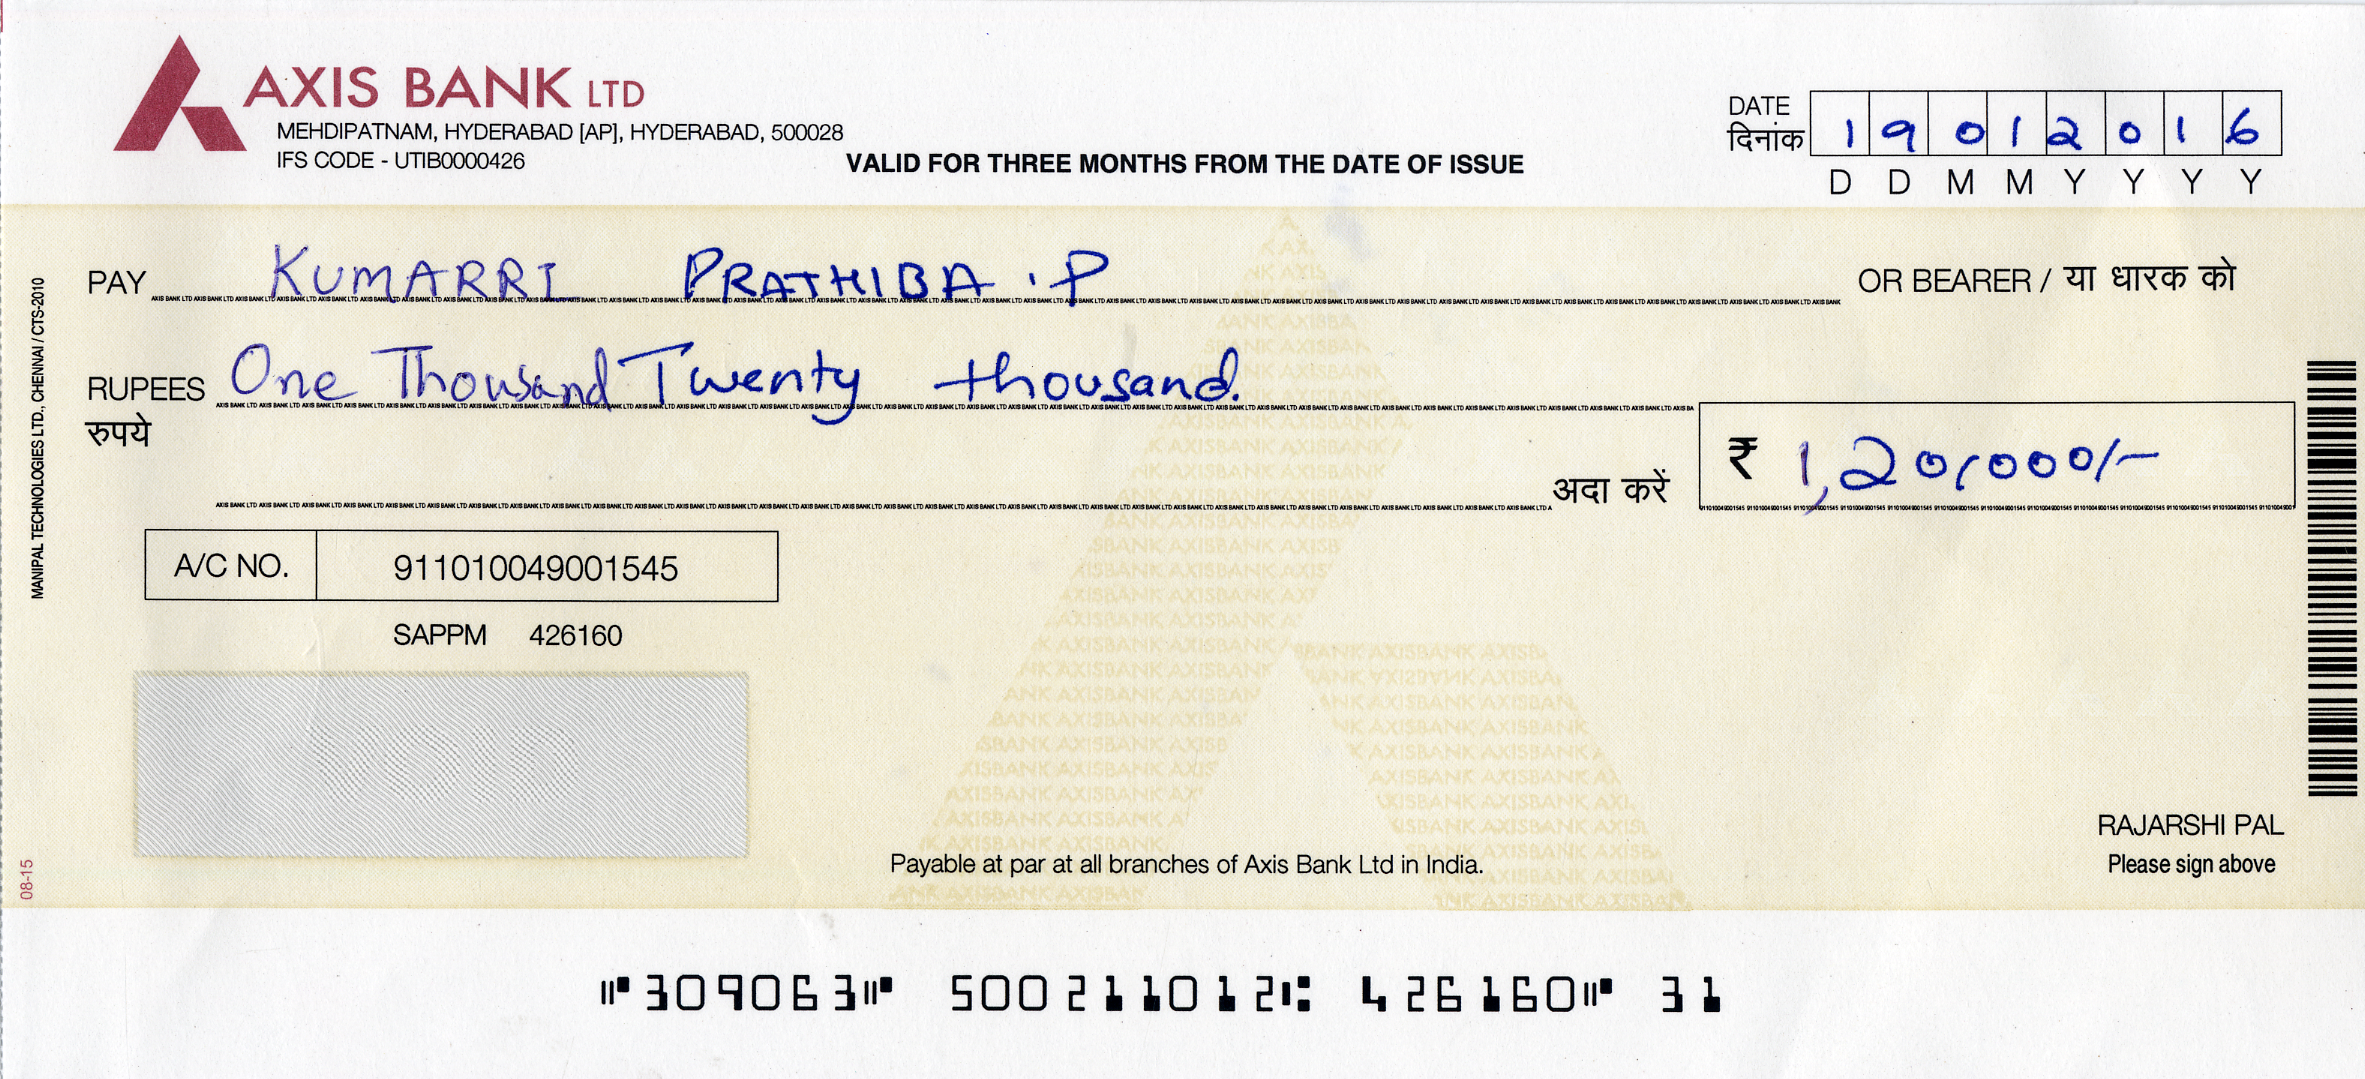

In [ ]:
image = Image.open('/content/drive/MyDrive/Classroom/Images/Cheque120612.jpg')
image

In [ ]:
print(pytesseract.image_to_string(image, lang = 'eng'))

MANIPAL TECHNOLOGIES LTD., CHENNAI / CTS-2010

08-15

AX| S BANK oe 500028 frie lal ot Blot é|

 

 

 

 

 

 

 

 

IFS CODE - UTIBO000426 VALID FOR THREE MONTHS FROM THE DATE OF ISSUE D DM Nev Y “aw,
PAY KUMARRI PRos hi BY a OR BEARER / UI §X@ Sr
o - z an
nee One. lWentewl J wenty +H ovsand)
ory ;
o/—-
FAT GX < L2Qeroe (
AICNO. | 911010049001545 |

 

SAPPM 426160

 

RAJARSHI PAL
Payable at par at all branches of Axis Bank Ltd in India. Please sign above

m3090B3" SOOrkbObCN ebsbOuw Alb



In [ ]:
!wget https://raw.githubusercontent.com/BigPino67/Tesseract-MICR-OCR/master/Tessdata/mcr.traineddata

--2023-05-02 07:02:22--  https://raw.githubusercontent.com/BigPino67/Tesseract-MICR-OCR/master/Tessdata/mcr.traineddata
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 147363 (144K) [application/octet-stream]
Saving to: ‘mcr.traineddata.2’

mcr.traineddata.2   100%[===================>] 143.91K  --.-KB/s    in 0.02s   

2023-05-02 07:02:23 (6.41 MB/s) - ‘mcr.traineddata.2’ saved [147363/147363]



In [ ]:
!cp mcr.traineddata /usr/share/tesseract-ocr/4.00/tessdata/

In [ ]:
check_img = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)
micr_img = check_img[950:1200, 120:1700]
check_img.shape

(1079, 2365, 3)

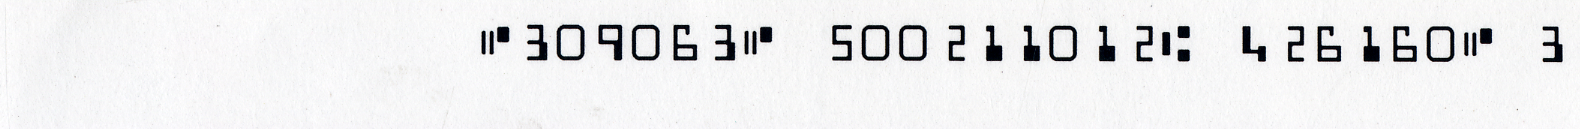

In [ ]:
import google.colab.patches
google.colab.patches.cv2_imshow(micr_img)

In [ ]:
a1 = (pytesseract.image_to_string(micr_img, lang = 'mcr'))
print(a1)

c309063c 500211012a 426160c 3



In [ ]:
num_str = ""
for m in a1:
    if m.isdigit():
        num_str = num_str + m
b1 = (num_str)
cheque_num = b1[:6]
print("This is the cheque Number: "+cheque_num)

This is the cheque Number: 309063
